# Player Classification with CNN

In [2]:
pip show tensorflow keras scipy livelossplot

Name: tensorflow
Version: 2.20.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\harsh\projects\machine-learning-projects\player classification\venv\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google_pasta, grpcio, h5py, keras, libclang, ml_dtypes, numpy, opt_einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing_extensions, wrapt
Required-by: 
---
Name: keras
Version: 3.12.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: d:\harsh\projects\machine-learning-projects\player classification\venv\lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow
---
Name: scipy
Version: 1.15.3
Summary: Fundamental algorithms for scien

The value specified in an AutoRun registry key could not be parsed.


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.metrics import Precision, Recall

In [4]:
classifier = Sequential()

In [5]:
# Convolution
classifier.add(Conv2D(32, 5, 5, input_shape = (256, 256, 3), activation = 'relu'))


d:\HARSH\Projects\Machine-Learning-Projects\Player Classification\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [7]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, 5, 5, activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [8]:
# Flattening
classifier.add(Flatten())

In [9]:
# Full connection
classifier.add(Dense(128, activation = 'relu'))

classifier.add(Dense(1, activation = 'sigmoid'))

In [10]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 51, 51, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 5, 5, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,721 (338.75 KB)

 Trainable params: 86,721 (338.75 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',Precision(),Recall()])

In [12]:
# To generate more images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2, # Rotate img anticlockwise
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory("dataset/train",
                                                 target_size = (256, 256),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 209 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('dataset/test',
                                            target_size = (256, 256),
                                            batch_size = 16,
                                            class_mode = 'binary')


Found 72 images belonging to 2 classes.


In [16]:
from livelossplot import PlotLossesKerasTF
# from livelossplot import PlotLosses

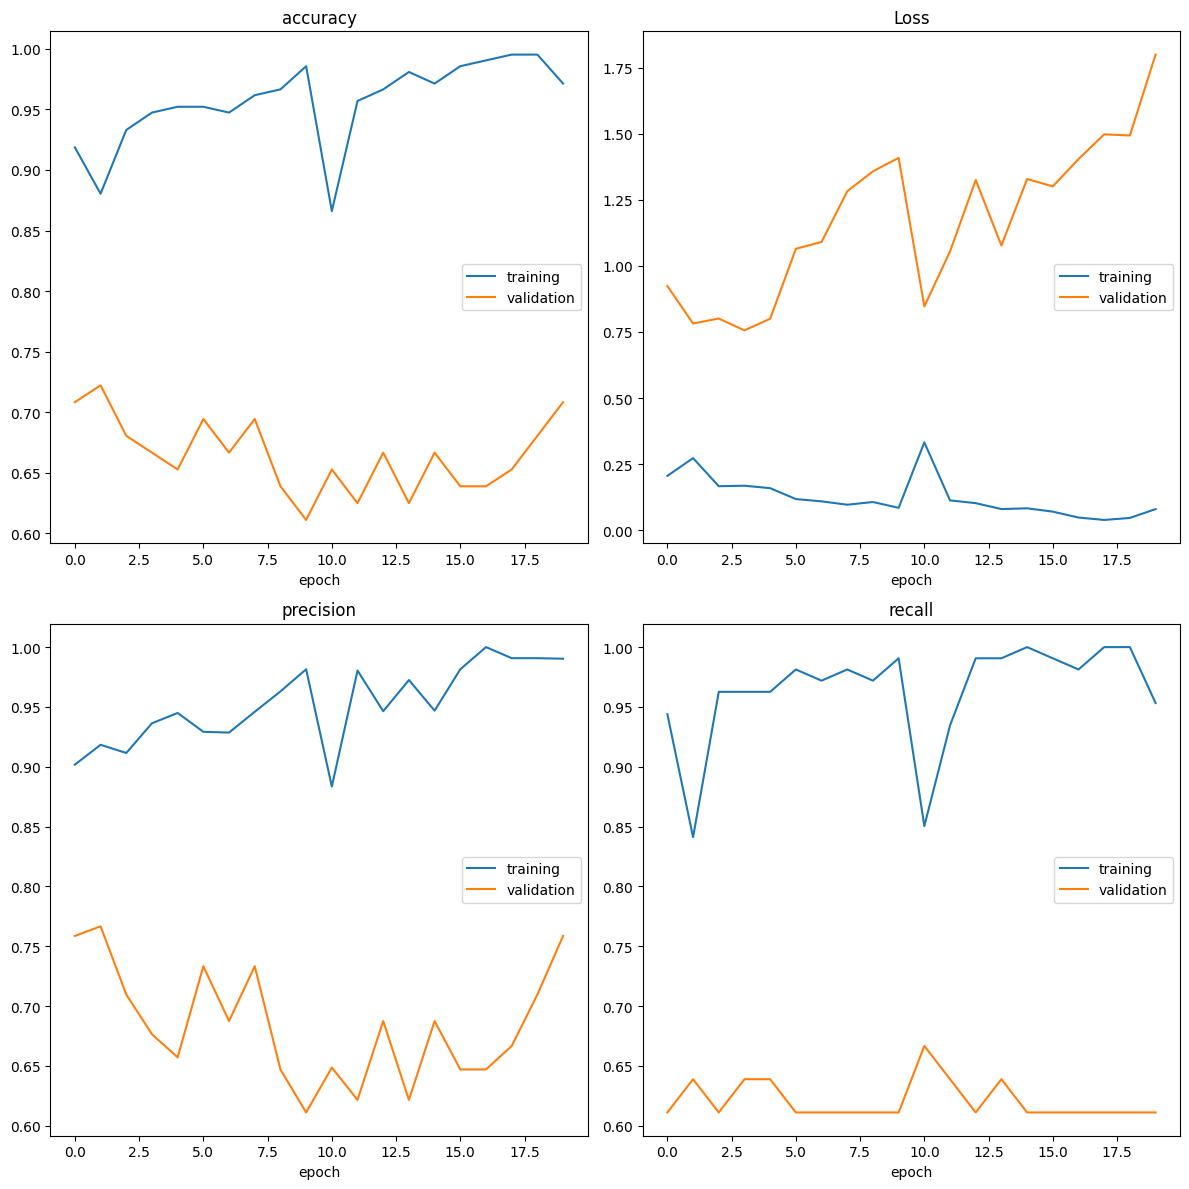

accuracy
	training         	 (min:    0.866, max:    0.995, cur:    0.971)
	validation       	 (min:    0.611, max:    0.722, cur:    0.708)
Loss
	training         	 (min:    0.039, max:    0.332, cur:    0.080)
	validation       	 (min:    0.756, max:    1.799, cur:    1.799)
precision
	training         	 (min:    0.883, max:    1.000, cur:    0.990)
	validation       	 (min:    0.611, max:    0.767, cur:    0.759)
recall
	training         	 (min:    0.841, max:    1.000, cur:    0.953)
	validation       	 (min:    0.611, max:    0.667, cur:    0.611)
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.9713 - loss: 0.0802 - precision: 0.9903 - recall: 0.9533 - val_accuracy: 0.7083 - val_loss: 1.7990 - val_precision: 0.7586 - val_recall: 0.6111


In [24]:
classifier.fit(training_set,epochs=20,validation_data = test_set,callbacks=[PlotLossesKerasTF()])

In [30]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('D:\\HARSH\\Projects\\Machine-Learning-Projects\\Player Classification\\dataset\\test\\dhoni\\d14.jpg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)

if result[0][0]>=0.5:
    prediction= 'kohli'
    print('Result is',result[0][0])
else:
    prediction = 'dhoni'
    print('Result is',result[0][0])
    
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Result is 1.0
kohli


In [29]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('D:\\HARSH\\Projects\\Machine-Learning-Projects\\Player Classification\\dataset\\test\\kohli\\kohli_0_24.jpeg',target_size=(256,256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
training_set.class_indices

if result[0][0]>=0.5:
    prediction= 'Kohli'
    print('Result is',result[0][0])
else:
    prediction = 'Dhoni'
    print('Result is',result[0][0])
    
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Result is 1.0
Kohli
